importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

importing the datasets

In [2]:
data_virat = pd.read_csv(r"D:\tech\Medium projects\Sachin vs Virat vs Rohit\dataset\archive_virat\71 Centuries of Virat Kohli.csv")
data_sachin = pd.read_csv(r"D:\tech\Medium projects\Sachin vs Virat vs Rohit\dataset\archive_sachin\Sachin Tendulkar - 100 Centuries.csv")
data_rohit = pd.read_csv(r"D:\tech\Medium projects\Sachin vs Virat vs Rohit\dataset\archive_rohit\Rohit-Sharma-All-International-Cricket-Centuries.csv")

### data analysis and preprocessing

1. analysing the virat kohli dataset

In [3]:
data_virat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Score             71 non-null     int64  
 1   Out/Not Out       71 non-null     object 
 2   Against           71 non-null     object 
 3   Batting Order     71 non-null     int64  
 4   Inn.              71 non-null     int64  
 5   Strike Rate       44 non-null     float64
 6   Venue             71 non-null     object 
 7   Column1           71 non-null     object 
 8   H/A               71 non-null     object 
 9   Date              71 non-null     object 
 10  Result            71 non-null     object 
 11  Format            71 non-null     object 
 12  Man of the Match  71 non-null     object 
 13  Captain           71 non-null     object 
dtypes: float64(1), int64(3), object(10)
memory usage: 7.9+ KB


2. analysing the sachin tendulkar dataset

In [4]:
data_sachin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   S.No.                100 non-null    int64  
 1   Score                100 non-null    int64  
 2   Dismissed            100 non-null    object 
 3   Captain              100 non-null    object 
 4   Player of the match  100 non-null    object 
 5   Against              100 non-null    object 
 6   Position             100 non-null    int64  
 7   Innings              100 non-null    int64  
 8   test                 51 non-null     float64
 9   Strike Rate          49 non-null     float64
 10  Venue                100 non-null    object 
 11  City                 100 non-null    object 
 12  H/A                  100 non-null    object 
 13  Date                 100 non-null    object 
 14  Result               100 non-null    object 
dtypes: float64(2), int64(4), object(9)
memory

3. analysing the rohit sharma dataset

In [5]:
data_rohit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No.       43 non-null     int64 
 1   Score     43 non-null     object
 2   Against   43 non-null     object
 3   Position  43 non-null     int64 
 4   Innings   43 non-null     int64 
 5   Venue     43 non-null     object
 6   Ground    43 non-null     object
 7   Date      43 non-null     object
 8   Result    43 non-null     object
dtypes: int64(3), object(6)
memory usage: 3.1+ KB


4. dropping the columns the are not reqd. and renaming columns from virat kohli dataset

In [6]:
data_virat = data_virat.rename(columns={"Venue":"Stadium", "Column1":"City", "Inn.":"Innings", "H/A":"Home/Away", 
                                  "Out/Not Out":"Dismissed"})
data_virat = data_virat.drop(["Dismissed","Batting Order","Innings","Strike Rate","Captain","Batting Order",
                  "Innings","Strike Rate","Home/Away","Result","Date","Format","City","Man of the Match"], axis=1)
data_virat.head()

,Score,Against,Stadium
0,116,Australia,Adelaide Oval
1,103,New Zealand,M. Chinnaswamy Stadium
2,103,England,Vidarbha Cricket Association Stadium
3,107,Australia,M. A. Chidambaram Stadium
4,119,South Africa,Wanderers Stadium


5. dropping the columns the are not reqd. and renaming columns from sachin tendulkar dataset

In [7]:
data_sachin = data_sachin.rename(columns={"Player of the match":"Man of the Match", "Venue":"Stadium"})
data_sachin = data_sachin.drop(["test","Date","S.No.","Dismissed","Captain","Position",
                  "Innings","Strike Rate","H/A","Result","City","Man of the Match"], axis=1)
data_sachin = data_sachin.reindex(columns=["Score","Against","Stadium"])
data_sachin.head()

,Score,Against,Stadium
0,119,England,Old Trafford
1,148,Australia,Sydney Cricket Ground
2,114,Australia,WACA Ground
3,111,South Africa,Wanderers Stadium
4,165,England,M. A. Chidambaram Stadium


6. dropping the columns the are not reqd. and renaming columns from rohit sharma dataset

In [8]:
data_rohit = data_rohit.rename(columns={"Venue":"Stadium"})
data_rohit = data_rohit.drop(["No.","Date", "Position", "Ground", "Innings","Result"], axis=1)
data_rohit.head()

,Score,Against,Stadium
0,114,Zimbabwe,"Queens Sports Club, Bulawayo"
1,101*,Sri Lanka,"Queens Sports Club, Bulawayo"
2,141*,Australia,"Sawai Mansingh Stadium, Jaipur"
3,209,Australia,"M. Chinnaswamy Stadium, Bangalore"
4,177,West Indies,"Eden Gardens, Kolkata"


7. count of virat kohli centuries against respective opponents

In [9]:
data_virat["Against"].value_counts()

Australia       15
Sri Lanka       13
West Indies     11
New Zealand      8
England          8
South Africa     7
Bangladesh       5
Pakistan         2
Zimbabwe         1
Afganistan       1
Name: Against, dtype: int64

8. count of sachin tendulkar centuries against respective opponents

In [10]:
data_sachin["Against"].value_counts()

Australia       20
Sri Lanka       17
South Africa    12
New Zealand      9
England          9
Zimbabwe         8
West Indies      7
Pakistan         7
Bangladesh       6
Kenya            4
Namibia          1
Name: Against, dtype: int64

9. count of rohit sharma centuries against respective opponents

In [11]:
data_rohit["Against"].value_counts()

Australia       9
Sri Lanka       8
South Africa    7
West Indies     6
England         5
Bangladesh      3
New Zealand     2
Pakistan        2
Zimbabwe        1
Name: Against, dtype: int64

10. creating a list of all the teams that both have played against

In [12]:
team = data_virat["Against"].value_counts().index.tolist()
for i in data_sachin["Against"]:
    if i not in team:
        team.append(i)
for i in data_rohit["Against"]:
    if i not in team:
        team.append(i)
team

['Australia',
 'Sri Lanka',
 'West Indies',
 'New Zealand',
 'England',
 'South Africa',
 'Bangladesh',
 'Pakistan',
 'Zimbabwe',
 'Afganistan',
 'Kenya',
 'Namibia']

11. creating a list of count of centuries against each team for virat kohli

In [13]:
Virat = []
for i in team:
    if i in data_virat["Against"].tolist():
        Virat.append(data_virat["Against"].value_counts()[i])
    else:
        Virat.append(0)
Virat

[15, 13, 11, 8, 8, 7, 5, 2, 1, 1, 0, 0]

12. creating a list of count of centuries against each team for sachin tendulkar

In [14]:
Sachin = []
for i in team:
    if i in data_sachin["Against"].tolist():
        Sachin.append(data_sachin["Against"].value_counts()[i])
    else:
        Sachin.append(0)
Sachin

[20, 17, 7, 9, 9, 12, 6, 7, 8, 0, 4, 1]

13. creating a list of count of centuries against each team for rohit sharma

In [15]:
Rohit = []
for i in team:
    if i in data_rohit["Against"].tolist():
        Rohit.append(data_rohit["Against"].value_counts()[i])
    else:
        Rohit.append(0)
Rohit

[9, 8, 6, 2, 5, 7, 3, 2, 1, 0, 0, 0]

14. creating a function for radar chart

In [16]:
def radar_chart(player1,player2,player3,comparison,label1,label2,label3,title):
    angles=np.linspace(0,2*np.pi,len(comparison), endpoint=False)
    angles=np.concatenate((angles,[angles[0]]))
    
    team.append(comparison[0])
    player1.append(player1[0])
    player2.append(player2[0])
    player3.append(player3[0])
    
    fig=plt.figure(figsize=(6,6))
    ax=fig.add_subplot(111, polar=True)

    #player1 Plot
    ax.plot(angles,player1, 'o-', color='g', linewidth=2, label=player1)
    ax.fill(angles,player1, alpha=0.25, color='g')
    #player2 Plot
    ax.plot(angles,player2, 'o-', color='orange', linewidth=2, label=player2)
    ax.fill(angles,player2, alpha=0.25, color='orange')
    #player3 Plot
    ax.plot(angles,player3, 'o-', color='purple', linewidth=2, label=player3)
    ax.fill(angles,player3, alpha=0.25, color='purple')

    ax.set_rgrids([0,5,10,15,20])
    ax.set_thetagrids(angles * 180/np.pi, team)
    ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                         horizontalalignment='center', verticalalignment='center')


    plt.grid(True)
    plt.tight_layout()
    labels = (label1,label2,label3)
    plt.legend(labels, loc=(0.9, .95),labelspacing=0.1, fontsize='medium')
    plt.show()


15. Sachin vs Virat vs Rohit 100s Comparison (Opponent wise)

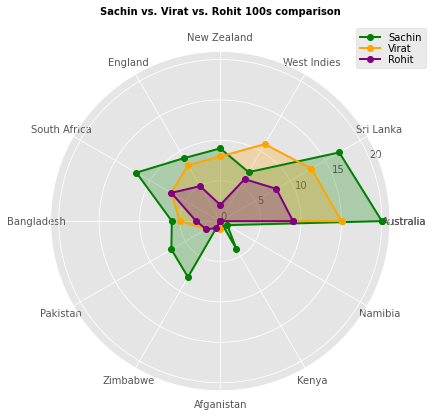

In [17]:
radar_chart(Sachin,Virat,Rohit,team,"Sachin","Virat","Rohit","Sachin vs. Virat vs. Rohit 100s comparison")

completed